In [11]:
df = pd.read_csv("NEO Earth Close Approaches.csv")
df.head()

,Object,Close-Approach (CA) Date,CA DistanceNominal (au),CA DistanceMinimum (au),V relative(km/s),V infinity(km/s),H(mag),Diameter,Rarity
0,(2023 XD),2023-Dec-07 01:01 ± < 00:01,0.00490,0.00489,9.94,9.88,26.9,11 m - 24 m,0
1,(2023 XT),2023-Dec-07 04:16 ± < 00:01,0.00549,0.00548,8.44,8.39,28.7,4.8 m - 11 m,0
2,(2023 XG2),2023-Dec-07 08:44 ± < 00:01,0.00395,0.00395,4.29,4.13,29.5,3.4 m - 7.6 m,0
3,(2023 XY),2023-Dec-07 17:41 ± 00:03,0.03683,0.03671,8.28,8.27,26.3,15 m - 33 m,0
4,(2023 XH),2023-Dec-07 22:28 ± < 00:01,0.01019,0.01017,6.21,6.17,26.7,12 m - 27 m,0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [10]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("NEO Earth Close Approaches.csv")
# Rename to remove AU from title

# Extract relevant features for clustering
features = df[['CA DistanceNominal (au)', 'V relative(km/s)', 'Nsigma', 'H(mag)']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

for n_clusters in range(2, 10):  # Try different numbers of clusters
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(features_scaled)
    inertia.append(gmm.bic(features_scaled))  # Use BIC (Bayesian Information Criterion) as a measure of model fit
    labels = gmm.predict(features_scaled)
    silhouette_scores.append(silhouette_score(features_scaled, labels))

# Plotting inertia to find the elbow point
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (BIC)')
plt.title('Elbow Method to Find Optimal Clusters')
plt.show()

# Plotting silhouette scores
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to Find Optimal Clusters')
plt.show()



KeyError: 'CA DistanceNominal(LD)'

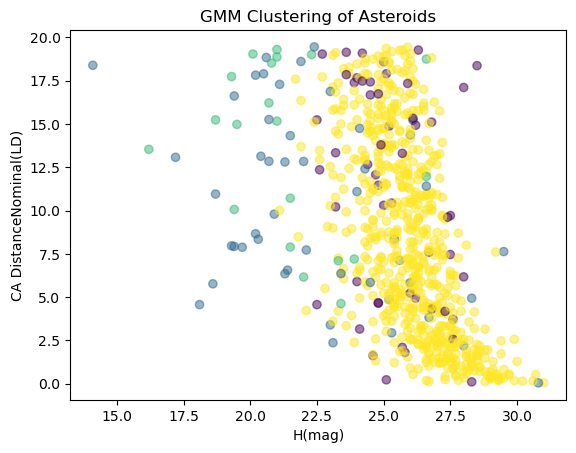

cluster  class
0        APO*      34
         ATE*      16
         AMO*       2
1        APO*      34
         ATE*      11
         AMO*       3
2        APO*      14
         ATE*       5
         IEO*       1
3        APO*     516
         ATE*      66
         AMO*      51
Name: class, dtype: int64


In [9]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset


# Extract relevant features for clustering
features = df[['CA DistanceNominal(LD)', 'Vrelative(km/s)', 'Nsigma', 'H(mag)']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=35)  # You can adjust the number of components

# Fit the model
gmm.fit(features_scaled)

# Add cluster labels to the original dataframe
df['cluster'] = gmm.predict(features_scaled)

# Visualize the clusters (you can modify this based on the number of features you choose)
plt.scatter(df['H(mag)'], df['CA DistanceNominal(LD)'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('H(mag)')
plt.ylabel('CA DistanceNominal(LD)')
plt.title('GMM Clustering of Asteroids')
plt.show()

# Check the distribution of classes within each cluster
cluster_counts = df.groupby('cluster')['class'].value_counts()
print(cluster_counts)


/Users/jacksonreydel/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    345
1    280
3    118
0     10
Name: Cluster, dtype: int64


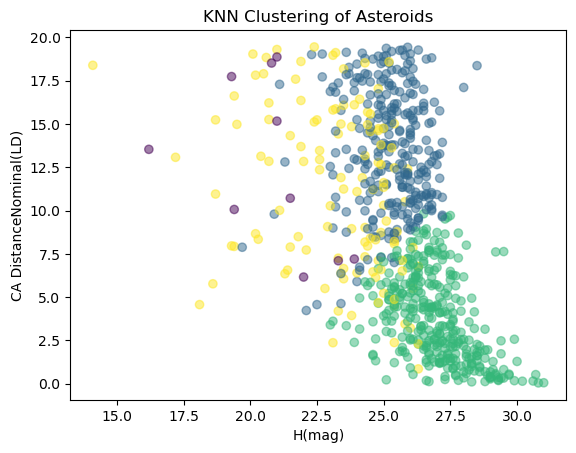

Cluster  class
0        APO*       8
         ATE*       2
1        APO*     193
         AMO*      49
         ATE*      38
2        APO*     294
         ATE*      45
         AMO*       6
3        APO*     103
         ATE*      13
         AMO*       1
         IEO*       1
Name: class, dtype: int64


In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df contains your DataFrame with the specified columns
features = df[['CA DistanceNominal(LD)', 'Vrelative(km/s)', 'Nsigma', 'H(mag)']]

# Filling NaN values with mean of respective columns
features = features.fillna(features.mean())

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initializing KMeans with the number of clusters
num_clusters = 4  # You can set the number of clusters as per your requirement
kmeans = KMeans(n_clusters=num_clusters)

# Fitting KMeans to the selected features
kmeans.fit(features_scaled)

# Getting cluster labels and assigning them to the DataFrame
df['Cluster'] = kmeans.labels_

# Displaying cluster counts
print(df['Cluster'].value_counts())

plt.scatter(df['H(mag)'], df['CA DistanceNominal(LD)'], c=df['Cluster'], cmap='viridis', alpha=0.5, label='Cluster')
plt.xlabel('H(mag)')
plt.ylabel('CA DistanceNominal(LD)')
plt.title('KNN Clustering of Asteroids')
plt.show()

cluster_counts = df.groupby('Cluster')['class'].value_counts()
print(cluster_counts)

In [65]:
df.head(50)

,index,Object,Close-Approach (CA) Date (TDB)YYYY-mmm-DD HH:MM ± D_HH:MM,CA DistanceNominal(LD),CA DistanceMinimum(LD),Vrelative(km/s),Vinfinity(km/s),Nsigma,H(mag),ref,class,cluster,Cluster
0,0,(2015 TC25),2017-Mar-26 14:51 ± 00:06,7.63,7.59,3.31,3.27,314000.0,29.5,10,APO*,0,3
1,1,(2017 FL63),2017-Mar-26 23:14 ± 00:01,4.16,4.12,17.29,17.28,240.0,26.1,1,APO*,3,0
2,2,(2017 FF3),2017-Mar-27 03:21 ± 00:02,5.75,5.74,2.89,2.83,812.0,26.9,2,APO*,3,3
3,3,(2017 FK3),2017-Mar-27 20:49 ± 00:01,9.08,8.99,8.93,8.91,202.0,26.1,1,APO*,3,1
4,4,215588 (2003 HF2),2017-Mar-28 19:43 ±,16.61,16.61,22.89,22.89,75200.0,19.4,59,APO*,0,4
5,5,(2017 FV),2017-Apr-02 03:42 ± 00:01,9.02,8.94,14.16,14.15,259.0,24.3,4,APO*,3,0
6,6,(2017 EB3),2017-Apr-04 06:11 ± 00:02,13.75,13.68,4.26,4.24,327.0,25.0,5,APO*,3,1
7,7,(2017 DC38),2017-Apr-05 23:04 ±,14.58,14.55,6.46,6.45,1360.0,24.5,11,AMO*,3,1
8,8,(2014 UR),2017-Apr-19 05:34 ±,18.74,18.74,4.39,4.38,4600000.0,26.6,24,ATE*,1,1
9,9,(2014 JO25),2017-Apr-19 12:24 ±,4.57,4.57,33.56,33.55,102000.0,18.1,21,APO*,1,4


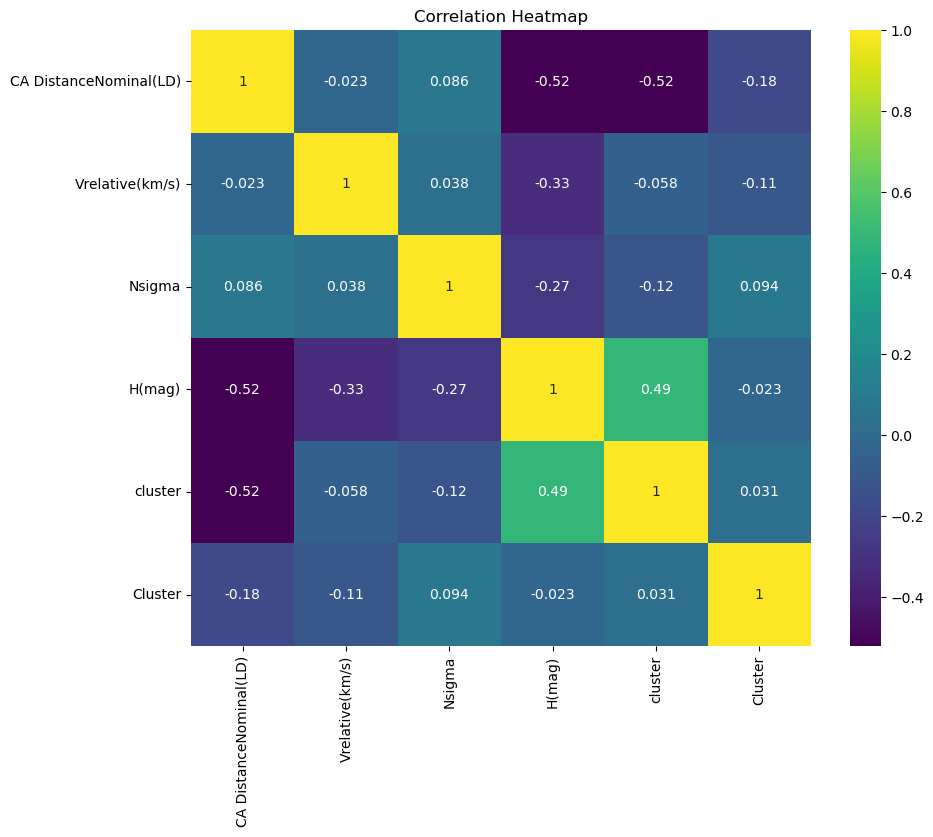

In [64]:
import seaborn as sns

# Selecting the subset of columns
selected_df = df[['CA DistanceNominal(LD)', 'Vrelative(km/s)', 'Nsigma', 'H(mag)', 'cluster', 'Cluster']
]

# Calculating the correlation matrix
correlation_matrix = selected_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis', annot=True)
plt.title('Correlation Heatmap')
plt.show()